# Week 3 HW - Tables, Groupby, Distributions
<span  style="color:purple; font-size:20px">
Systems & Technologies: Python  
Week 3
</span>

# `tips`

Food servers' tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule

|Variable Name | Variable Meaning |
|---  |---                 |
| total_bill | Total bill (cost of the meal), including tax, in US dollars |
| tip | Tip (gratuity) in US dollars |
| sex | Sex of person paying for the meal (0=male, 1=female) |
| smoker | Smoker in party? (0=No, 1=Yes) |
| day | Day of Week (4=Thur, 5=Fri, 6=Sat, 7=Sun) |
| time | Dinner, Lunch |
|size  | Size of the party |

In [5]:
# Import necessary libraries, and modify DataFrame for convenience
import pandas as pd

tips = pd.read_csv(r'C:/Users/malab/OneDrive/Documents/Systems and Technologies; Python/ST-Python 64502/ST-Python 64502/notebooks/data-sets/tips.csv')
tips['day'].replace({4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}, inplace = True)
tips['smoker'].replace({0:'No', 1:'Yes'}, inplace = True)
tips['sex'].replace({0:'Male', 1:'Female'}, inplace = True)
tips['tip_percent'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Male,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Female,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Female,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Female,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Male,No,Sun,Dinner,4,0.146808


### Exercise 1: (5 points)
<span  style="color:purple; font-size:16px">On which day of the week does the waiter serve the largest parties, on average? There are several ways to answer this question. Try to find at least two different solutions.</span>


In [10]:
# Answer
averages = tips.groupby('day')['size'].mean().sort_values()
averages

averages2 = tips.groupby('day').agg({'size': 'mean'})
averages2

,size
day,
Fri,2.105263
Sat,2.517241
Sun,2.842105
Thur,2.451613


### Exercise 2: (5 points)
<span  style="color:purple; font-size:16px">Calculate the average bill by day and time and round to 1 decimal place. What day-time combination has the highest average bill? What day-time combination has the lowest average bill?</span>


In [13]:
# Answer
day_and_time = tips.groupby(['day', 'time']).agg({'total_bill':'mean'}).round(1)
day_and_time
# Dinner on Sunday night, on average, had the highest bill. Lunch on Friday, on average, 
# had the lowest bill. 

total_bill
day  time              
Fri  Dinner        19.7
     Lunch         12.8
Sat  Dinner        20.4
Sun  Dinner        21.4
Thur Dinner        18.8
     Lunch         17.7

### Exercise 3: (5 points)
<span  style="color:purple; font-size:16px">Extract the average bill for Friday lunch from the result of Exercise 2.</span>

In [14]:
# Answer
day_and_time.loc['Fri', 'Lunch']


total_bill    12.8
Name: (Fri, Lunch), dtype: float64

### Exercise 4: (5 points)
<span  style="color:purple; font-size:16px">Use `.groupby()` to make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?</span>

<AxesSubplot: xlabel='sex'>

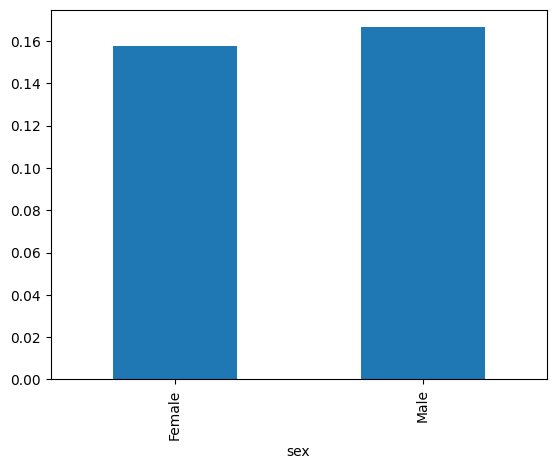

In [23]:
# Answer

tips.groupby('sex')['tip_percent'].mean().plot(kind = 'bar')
# The distribution of tip percentages shows that males, on average, leave a larger tip 
# than females.

### Exercise 5: (10 points)
<span  style="color:purple; font-size:16px">Make a visualization that shows the average tip percentage as a function of table size. Describe the relationship between party size and average tip percentage?</span>

<AxesSubplot: xlabel='size'>

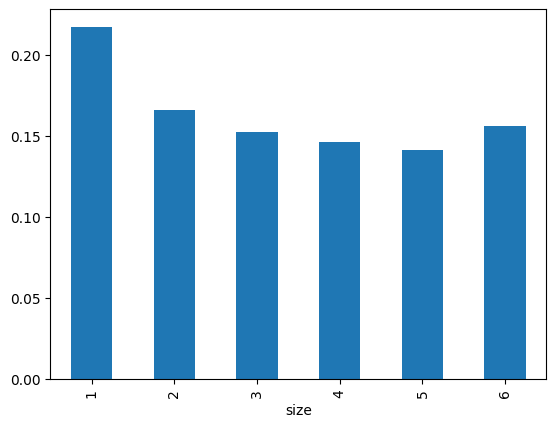

In [24]:
# Answer

tips.groupby('size')['tip_percent'].mean().plot(kind = 'bar')
# Tip percentages tend to go down as the party size increases with the exceptional 
# case where the party is 6.

### Exercise 6: (5 points)
<span  style="color:purple; font-size:16px">Calculate the average total bill by day, time, and party size. Display the results in a pivot table.</span>

In [65]:
# Answer
tips.pivot_table(index = 'day',
                 columns = ['size','time'],
                   values = 'total_bill', 
                   aggfunc = 'mean').round(1)

size      1            2            3            4            5            6  \
time Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner   
day                                                                            
Fri     NaN   8.6   17.8  13.1    NaN  16.0   40.2   NaN    NaN   NaN    NaN   
Sat     5.2   NaN   16.8   NaN   25.5   NaN   29.9   NaN   28.2   NaN    NaN   
Sun     NaN   NaN   17.6   NaN   22.2   NaN   26.7   NaN   27.0   NaN   48.2   
Thur    NaN  10.1   18.8  15.1    NaN  19.2    NaN  30.0    NaN  41.2    NaN   

size        
time Lunch  
day         
Fri    NaN  
Sat    NaN  
Sun    NaN  
Thur  30.4

### Exercise 7: (5 points)
<span  style="color:purple; font-size:16px">Make a bar chart showing the average total bill by party size, day, and time. (Place party size on the $x$-axis)</span>

<AxesSubplot: xlabel='size'>

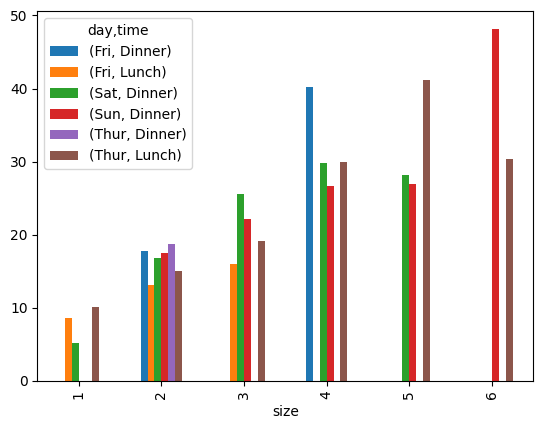

In [28]:
# Answer
tips.pivot_table(index = 'size', 
                   columns = ['day', 'time'], 
                   values = 'total_bill', 
                   aggfunc = 'mean').plot(kind = 'bar')

### Exercise 8: (5 points)
<span  style="color:purple; font-size:16px">Make a bar chart showing the tip percent by party size, and day. (Place day on the $x$-axis, average `tip_percent` on the $y$-axis, and the bars colored by party `size`. Use `pivot_table()` to reshape the data appropriately.)</span>

<AxesSubplot: xlabel='day'>

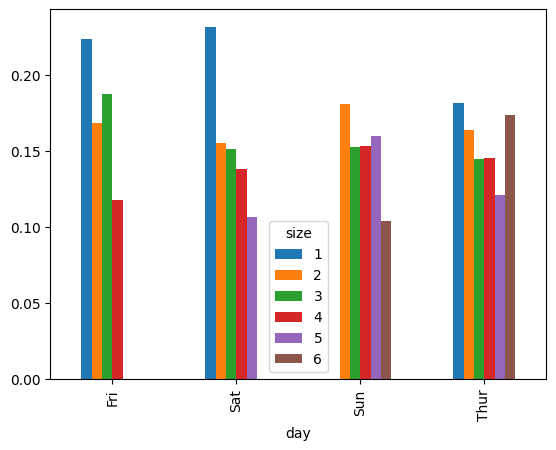

In [29]:
# Answer
tips.pivot_table(index = 'day', 
                   columns = 'size', 
                   values = 'tip_percent', 
                   aggfunc = 'mean').plot(kind = 'bar')

### Exercise 9: (10 points)
<span  style="color:purple; font-size:16px">Create the table from exercise 6 using `.groupby()` and `.unstack()` (Hint: You need to use `unstack()` twice to unstack each level of the index. Literally, your code will have `some_stuff.unstack().unstack()`)</span>

In [64]:
# Answer
tips.groupby(['day','time','size'])['total_bill'].mean().round(1).unstack().unstack()


size      1            2            3            4            5            6  \
time Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner   
day                                                                            
Fri     NaN   8.6   17.8  13.1    NaN  16.0   40.2   NaN    NaN   NaN    NaN   
Sat     5.2   NaN   16.8   NaN   25.5   NaN   29.9   NaN   28.2   NaN    NaN   
Sun     NaN   NaN   17.6   NaN   22.2   NaN   26.7   NaN   27.0   NaN   48.2   
Thur    NaN  10.1   18.8  15.1    NaN  19.2    NaN  30.0    NaN  41.2    NaN   

size        
time Lunch  
day         
Fri    NaN  
Sat    NaN  
Sun    NaN  
Thur  30.4

### Exercise 10: (5 points)
<span  style="color:purple; font-size:16px">Calculate the joint probability distribution between day of the week and party size using the `pd.crosstab()` function and appropriate arguments.</span>


In [77]:
# Answer
joint = pd.crosstab(index = tips['day'],
                        columns = tips['size'],
                        normalize = True)
joint

size,1,2,3,4,5,6
day,,,,,,
Fri,0.004098,0.065574,0.004098,0.004098,0.000000,0.000000
Sat,0.008197,0.217213,0.073770,0.053279,0.004098,0.000000
Sun,0.000000,0.159836,0.061475,0.073770,0.012295,0.004098
Thur,0.004098,0.196721,0.016393,0.020492,0.004098,0.012295


### Exercise 11: (10 points)
<span  style="color:purple; font-size:16px">Make a visualization that displays the conditional distribution of party size, given the day of the week.</span>

(Hint: use `crosstab()` to reshape the data appropriately with the days of the week as the index and the party size as the column. To obtain the *conditional* distributions, use the `normalize = 'index'` argument to normalize the distribution row-wise before passing the resulting data matrix to the `plot()` method.)

<AxesSubplot: xlabel='day'>

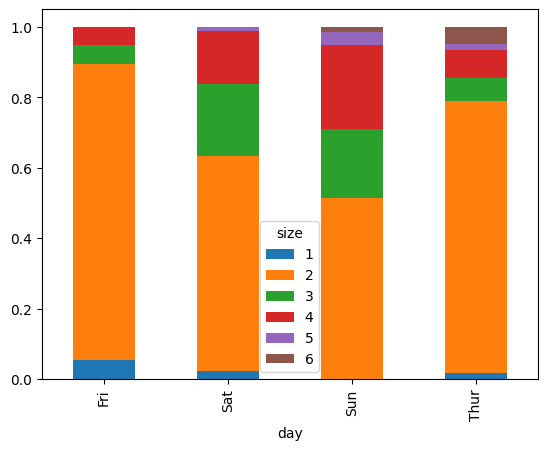

In [84]:
# Answer
pd.crosstab(index = tips['day'],
                        columns = tips['size'],
                        normalize = 'index',
                        margins = False).plot(kind = 'bar', stacked = True)

### Exercise 12: (5 points)
<span  style="color:purple; font-size:16px">What proportion of parties had two people **GIVEN** the day of week was a Saturday? What type of distribution do you need to calculate to answer this question? Use `crosstab()` and extract the required value.</span>


In [78]:
# Answer
# The proportion of parties that had two people GIVEN the day of the week was a Saturday 
# was .609
# You need to calculate the conditional distribution to answer the question.

pd.crosstab(index = tips['day'],
                        columns = tips['size'],
                        normalize = 'index',
                        margins = False).loc['Sat',2].round(3)

0.609

### Exercise 13: (5 points)
<span  style="color:purple; font-size:16px">What proportion of tables were served on Saturday **GIVEN** the party contained exactly two people? What type of distribution do you need to calculate to answer this question? Use `crosstab()` and extract the required value.</span>


In [82]:
# Answer
# The proportion of tables served on Saturday GIVEN the party contained exactly two 
# people was .34
# You need to calculate the conditional distribution to answer the question.
pd.crosstab(index = tips['size'],
                        columns = tips['day'],
                        normalize = 'index',
                        margins = False).loc[2,'Sat'].round(3)

0.34

### Exercise 14: (10 points)
<span  style="color:purple; font-size:16px">What proportion of tables were served by the waiter on Saturday? What distribution is required to answer this question? Use `crosstab()` and extract the required value.</span>


In [91]:
# Answer
# The proportion of tables served by the waiter on Saturday was .357
# The distribution required to answer this question is the marginal distribution.
marg_dist = pd.crosstab(index = tips['day'],
                        columns = tips['size'],
                        normalize = True).sum(axis = 1)
marg_dist['Sat'].round(3)

0.357

### Exercise 15: (10 points)
<span  style="color:purple; font-size:16px">What proportion of tables were served by the waiter on Saturday **AND** had a party size of 5? What distribution is required to answer this question? Use `crosstab()` and extract the required value.</span>


In [92]:
# Answer
# The proportion of tables that were served by the waiter on Saturday and had a party 
# size of 5 was .004
# The distribution required to answer this question is the joint distribution. 
pd.crosstab(index = tips['day'],
                        columns = tips['size'],
                        normalize = True).loc['Sat', 5].round(3)

0.004